In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [ ]:
df = pd.read_csv('Sales Data.csv', encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,...,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,...,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,...,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,...,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,...,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,...,Auto,2,23877.0,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [30]:
#deleting columns with no data 
df.drop(['Status','unnamed1'], axis=1,inplace= True)

In [40]:
pd.isnull(df).any()

User_ID             False
Cust_name           False
Product_ID          False
Gender              False
Age Group           False
Age                 False
Marital_Status      False
State               False
Zone                False
Occupation          False
Product_Category    False
Orders              False
Amount              False
dtype: bool

In [39]:
df.dropna(inplace= True)

In [46]:
#Changing datatype of "amount" to int from float
df.Amount = df.Amount.astype('int')
# OR df['Amount'] = df['Amount'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [1]:
df.rename(columns = {'Gender': 'Sex'}, inplace = True)

In [48]:
#Give us the biodata of the dataframe
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


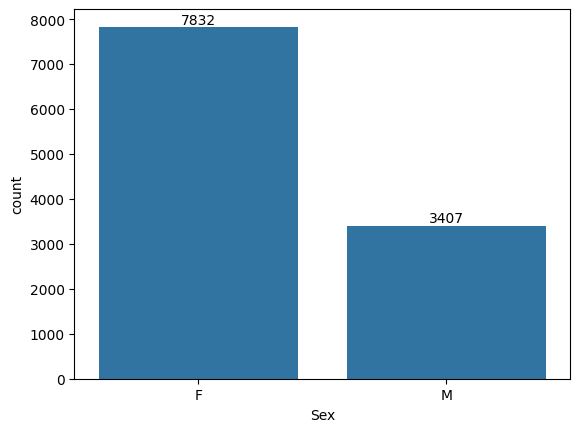

In [63]:
gender_chart = sb.countplot(x = 'Sex', data = df)
# for labeling the bars
for container in gender_chart.containers:
    gender_chart.bar_label(container, label_type='edge')


#The `label_type` argument in `ax.bar_label` controls the placement of the labels relative to the bars. Here are the possible values and their meanings:

#- 'edge': Labels are placed at the top edge of the bars. This is the default value.
#- 'center': Labels are placed at the center of the bars.
#- 'edge_top': Labels are placed at the top edge of the bars.
#- 'edge_bottom': Labels are placed at the bottom edge of the bars.



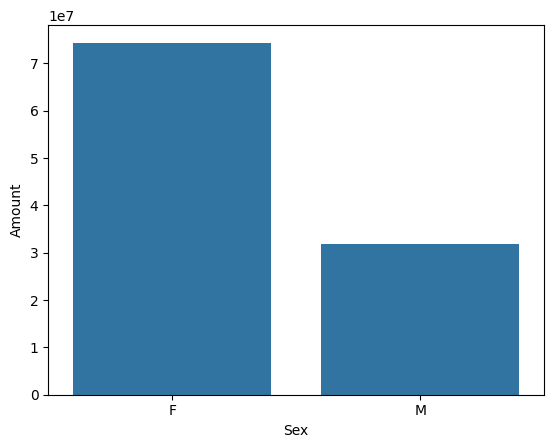

In [66]:
sales_sex = df.groupby(['Sex'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_sex_chart = sb.barplot(x='Sex',y='Amount', data = sales_sex)

From the above barchart we can say that women have greater purchasing power

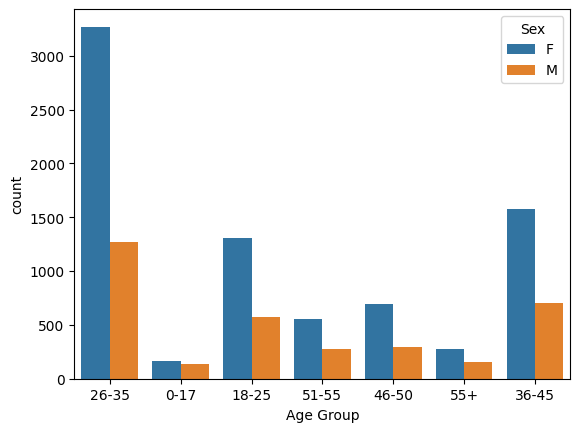

In [74]:
age_chart = sb.countplot(x = 'Age Group', hue = 'Sex', data = df)

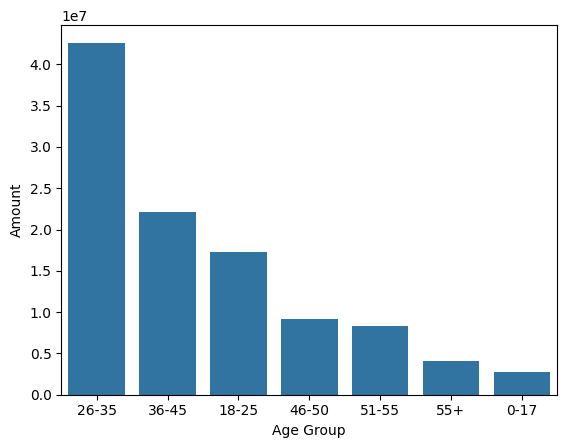

In [76]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age_chart = sb.barplot(x='Age Group',y='Amount', data = sales_age)

We see that the large part of our customers are in the age group of 26-35 and they have a greater purchasing power

<AxesSubplot: xlabel='State', ylabel='Amount'>

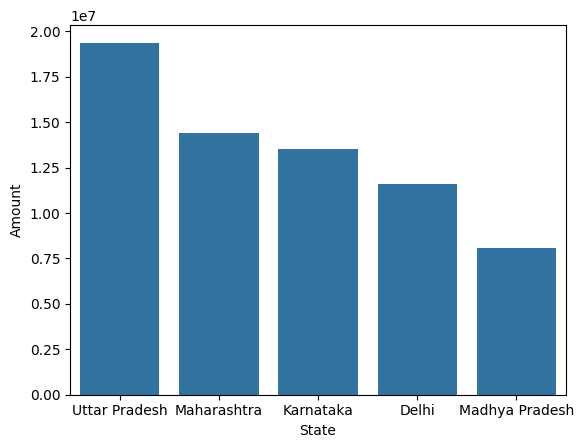

In [81]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sb.barplot(x= 'State',y='Amount',data=sales_state)

We see that top 5 states in terms of amount of sale are UP, Maharashtra, Karnataka, Delhi, and MP

<AxesSubplot: xlabel='Marital_Status', ylabel='Amount'>

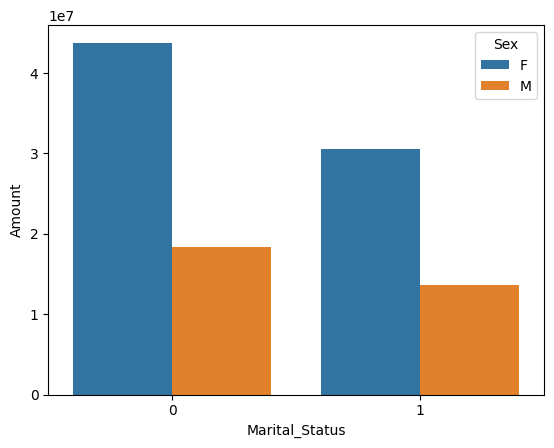

In [85]:
sales_marriage = df.groupby(['Marital_Status','Sex'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sb.barplot(x= 'Marital_Status',y='Amount', hue='Sex',data=sales_marriage)

We see that the greater part of our sales comes from married women.

<AxesSubplot: xlabel='Occupation', ylabel='Amount'>

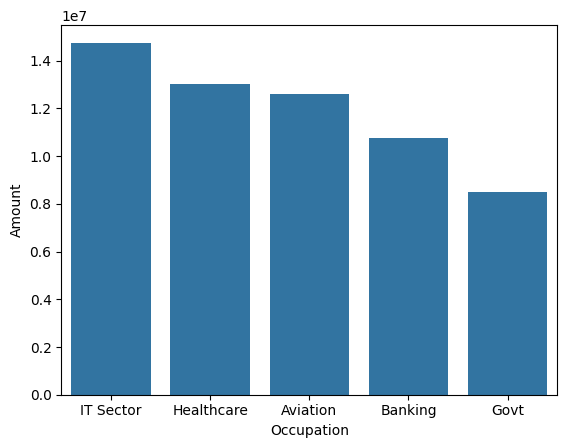

In [96]:
sales_work = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sb.barplot(x= 'Occupation',y='Amount',data=sales_work)

We see that majority of our customers work in IT, Healthcare, Aviation, Banking, and Government sector.

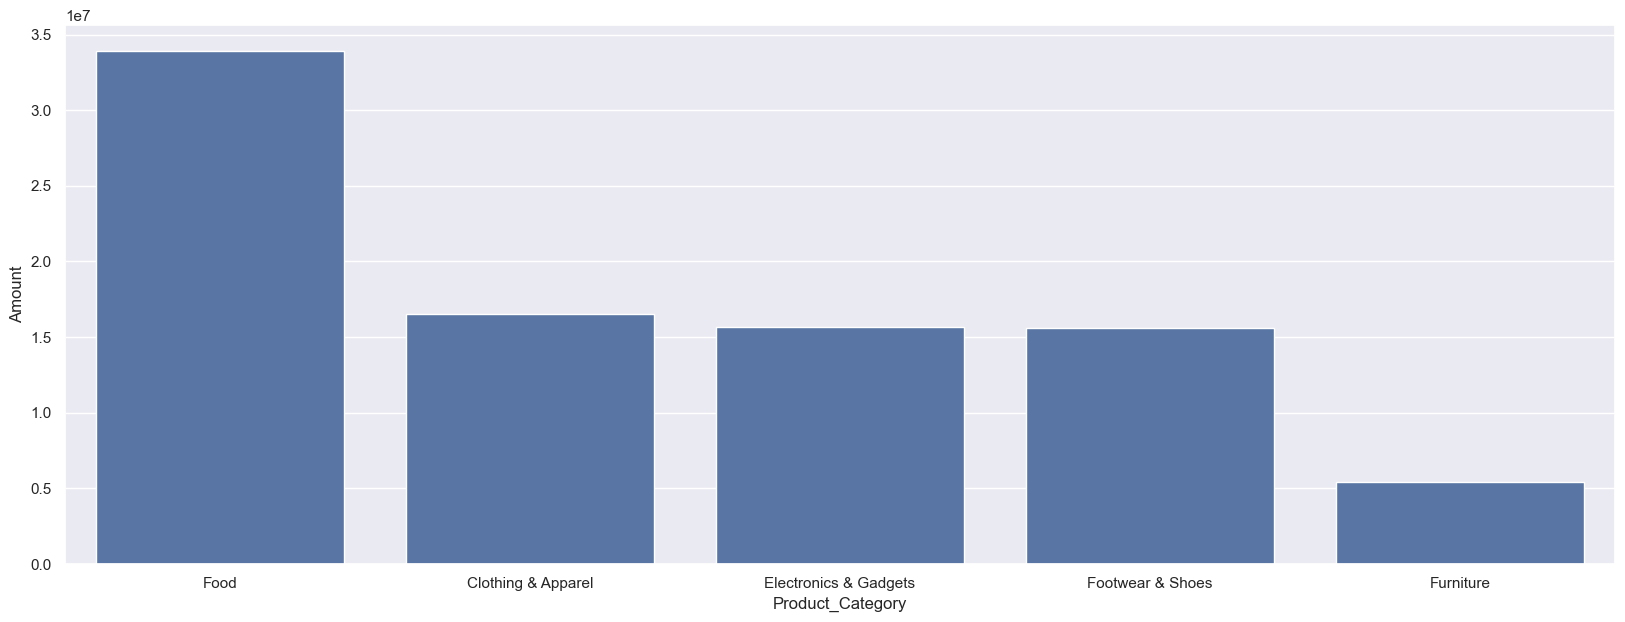

In [125]:
sales_productCategory = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(5)
sb.barplot(x= 'Product_Category',y='Amount', data=sales_productCategory)
sb.set(rc={'figure.figsize':(20,7)}) #plt.figure(figsize=(20,7))


We see our top 5 best selling product category which are Food, Clothing & Apparel, Elecrtonics and Gadgets, Footwear, and Furniture.

Conclusion:
Married Women of age group 26-30yrs from UP, Maharashtra, Karnataka, Delhi, and MP, working in IT, Healthcare, Aviation, Banking, and Government sector, mostly buy Food, Clothing & Apparel, Elecrtonics and Gadgets, Footwear, and Furniture.  